# <center>Use of Sentiment Analysis on Elon Musk’s Tweets to Predict Tesla’s Stock Movement</center>
<center> Authors: </center>
<center> Khawla Bounouh 3137274 </center>


.

### Data Pre-Processing 
In this project we will use a dataset that provides a collection of tweets posted by Elon Musk over a definite period of time, specifically capturing Elon Musk’s thoughts, announcements, and interactions related to Tesla and other topics of interest. Each tweet in the dataset includes information such as the tweet ID, tweet content and the date and time in which the tweet was posted.
It was obtained by using the Twitter API, which allows access to public tweets based on specific search criteria.
In order to perfom our sentiment analysis and try to predict stock market movements, we will have to pre-process our data by following a few steps like feature selection, data cleaning etc. We do this in the goal of increasing accruacy of our results and facilitating any potential computation.

We start by importing the relevant libraries and read the dataset:

In [154]:
import sklearn
import pandas as pd
import numpy as np
import re

Read the dataset print its size.

In [155]:
Metadata = pd.read_csv('elon_tweets.csv')
print("Dataframe dimensions:", np.shape(Metadata))


Dataframe dimensions: (1782, 3)


In [156]:
Metadata.head(10)

,id,created_at,text
0,1513288055146225671,2022-04-10T22:49:22.000Z,@JeffBezos Great idea
1,1513283265318191106,2022-04-10T22:30:20.000Z,@BLKMDL3 Coming soon
2,1513233496893915138,2022-04-10T19:12:34.000Z,@tesla_raj Exciting times ahead
3,1513200041518768133,2022-04-10T16:59:38.000Z,@pmarca Disconnected from what it takes to mak...
4,1513199588454264832,2022-04-10T16:57:50.000Z,@teslaownersSV I’m serious about this one btw
5,1512974273606045702,2022-04-10T02:02:31.000Z,@sweatystartup Exactly
6,1512964005060657156,2022-04-10T01:21:42.000Z,"@PPathole Price should probably be ~$2/month, ..."
7,1512958155508043782,2022-04-10T00:58:28.000Z,@PPathole It should go away or scammers will g...
8,1512954808394731521,2022-04-10T00:45:10.000Z,@GonzaAbalos Maybe even an option to pay in Doge?
9,1512951272437174279,2022-04-10T00:31:07.000Z,"@GonzaAbalos Yes, should be proportionate to a..."


We start the pre-processing of our data:
First, we remove any special characters, such as punctuation marks, emojis, and symbols,that often carry little to no meaning in sentiment analysis. Removing them helps reduce noise and focuses on the relevant text content.

In [157]:
def remove_special_characters(text):
    processed_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return processed_text
df = Metadata[['text']]
Metadata['text'] = Metadata['text'].apply(remove_special_characters)
Metadata.head(10)



,id,created_at,text
0,1513288055146225671,2022-04-10T22:49:22.000Z,JeffBezos Great idea
1,1513283265318191106,2022-04-10T22:30:20.000Z,BLKMDL3 Coming soon
2,1513233496893915138,2022-04-10T19:12:34.000Z,teslaraj Exciting times ahead
3,1513200041518768133,2022-04-10T16:59:38.000Z,pmarca Disconnected from what it takes to make...
4,1513199588454264832,2022-04-10T16:57:50.000Z,teslaownersSV Im serious about this one btw
5,1512974273606045702,2022-04-10T02:02:31.000Z,sweatystartup Exactly
6,1512964005060657156,2022-04-10T01:21:42.000Z,PPathole Price should probably be 2month but p...
7,1512958155508043782,2022-04-10T00:58:28.000Z,PPathole It should go away or scammers will ga...
8,1512954808394731521,2022-04-10T00:45:10.000Z,GonzaAbalos Maybe even an option to pay in Doge
9,1512951272437174279,2022-04-10T00:31:07.000Z,GonzaAbalos Yes should be proportionate to aff...


Then, we put the tweet texts into lowercase, this helps in reducing the dimensionality of the data and avoids treating the same word differently based on its capitalization.

In [158]:
Metadata['text'] = Metadata['text'].str.lower()
Metadata.head(10)

,id,created_at,text
0,1513288055146225671,2022-04-10T22:49:22.000Z,jeffbezos great idea
1,1513283265318191106,2022-04-10T22:30:20.000Z,blkmdl3 coming soon
2,1513233496893915138,2022-04-10T19:12:34.000Z,teslaraj exciting times ahead
3,1513200041518768133,2022-04-10T16:59:38.000Z,pmarca disconnected from what it takes to make...
4,1513199588454264832,2022-04-10T16:57:50.000Z,teslaownerssv im serious about this one btw
5,1512974273606045702,2022-04-10T02:02:31.000Z,sweatystartup exactly
6,1512964005060657156,2022-04-10T01:21:42.000Z,ppathole price should probably be 2month but p...
7,1512958155508043782,2022-04-10T00:58:28.000Z,ppathole it should go away or scammers will ga...
8,1512954808394731521,2022-04-10T00:45:10.000Z,gonzaabalos maybe even an option to pay in doge
9,1512951272437174279,2022-04-10T00:31:07.000Z,gonzaabalos yes should be proportionate to aff...


We remove the time portion of the "created_at" column and only keep the date of the tweets.
This is because we are willing to do a daily analysis, so the time is not important.

In [159]:
Metadata['created_at'] = pd.to_datetime(Metadata['created_at'])
Metadata['created_at'] = Metadata['created_at'].dt.date
Metadata.head(10)


,id,created_at,text
0,1513288055146225671,2022-04-10,jeffbezos great idea
1,1513283265318191106,2022-04-10,blkmdl3 coming soon
2,1513233496893915138,2022-04-10,teslaraj exciting times ahead
3,1513200041518768133,2022-04-10,pmarca disconnected from what it takes to make...
4,1513199588454264832,2022-04-10,teslaownerssv im serious about this one btw
5,1512974273606045702,2022-04-10,sweatystartup exactly
6,1512964005060657156,2022-04-10,ppathole price should probably be 2month but p...
7,1512958155508043782,2022-04-10,ppathole it should go away or scammers will ga...
8,1512954808394731521,2022-04-10,gonzaabalos maybe even an option to pay in doge
9,1512951272437174279,2022-04-10,gonzaabalos yes should be proportionate to aff...


We noticed that there many tweets that were posted during the same day, hence we decided to group the tweets by date and combine them using a specified separator.

In [160]:
Metadata['created_at'] = pd.to_datetime(Metadata['created_at'])
Combined = Metadata.groupby('created_at')['text'].apply('\n'.join).reset_index()
print(Combined)

    created_at                                               text
0   2022-04-03  berlin rocks\nerdayastronaut tesla raptor pump...
1   2022-04-04  hausmank googleai staggeringly unfunny\nwholem...
2   2022-04-05  pmarca skepticaliblog yikes\npmarca wapo alway...
3   2022-04-06  remedygames great games\nstockmktnewz no sale ...
4   2022-04-07  rt netflixfilm return to space\non netflix apr...
..         ...                                                ...
115 2022-09-11  cbdoge paraga sigh\nfsd beta 10692 rolling out...
116 2022-09-12  the residual value of gasoline cars bought tod...
117 2022-09-13  huobiglobal subtle \nhuobiglobal \nnote we are...
118 2022-09-14  salted butter is amazing but should be stored ...
119 2022-09-15  ilyasut or their short shorts httpstcoek4xby92...

[120 rows x 2 columns]


Then we perfmed stop word removal by tokenizing the tweets and filtering out the stop words.
Stop words are commonly used words that do not carry significant meaning in sentiment analysis. Removing words such as "the," "is," "and," "in," etc helps reducing noise and focuses on the more informative words in the text.

In [161]:
#stop words removal 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


In [162]:
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a tweet
def remove_stopwords(tweet):
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # Join the filtered tokens back into a tweet
    filtered_tweet = ' '.join(filtered_tokens)
    return filtered_tweet

# Apply the remove_stopwords function to the 'tweet' column
Combined['text'] = Combined['text'].apply(remove_stopwords)

# Print the updated DataFrame
Combined.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/labuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,created_at,text
0,2022-04-03,berlin rocks erdayastronaut tesla raptor pump ...
1,2022-04-04,hausmank googleai staggeringly unfunny wholema...
2,2022-04-05,pmarca skepticaliblog yikes pmarca wapo always...
3,2022-04-06,remedygames great games stockmktnewz sale took...
4,2022-04-07,rt netflixfilm return space netflix april 7 el...
5,2022-04-08,pmarca lmaooo waitbutwhy real problem ppathole...
6,2022-04-09,teslaownerssv resemblance uncanny httpstcoegfd...
7,2022-04-10,jeffbezos great idea blkmdl3 coming soon tesla...
8,2022-04-14,httpstcopfqypliuvd billym2k vladtenev exactly ...
9,2022-04-15,daelmor mfrunker 28delayslater wholemarsblog r...


In [163]:
#change name in order to merge later with stock dataset
Combined = Combined.rename(columns={'created_at': 'Date'})

Now we read the Tesla stocks data set

In [164]:
#stockdata from YahooFinance in the specific date range
stock=pd.read_csv('TSLA.csv')
stock.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-04,363.126678,383.303345,357.510010,381.816681,381.816681,82035900
1,2022-04-05,378.766663,384.290009,362.433319,363.753326,363.753326,80075100
2,2022-04-06,357.823334,359.666656,342.566681,348.586670,348.586670,89348400
3,2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200
4,2022-04-08,347.736664,349.480011,340.813324,341.829987,341.829987,55013700
5,2022-04-11,326.799988,336.156677,324.880005,325.309998,325.309998,59357100
6,2022-04-12,332.546661,340.396667,325.533325,328.983337,328.983337,65976000
7,2022-04-13,327.026672,342.079987,324.366669,340.790009,340.790009,55121100
8,2022-04-14,333.096680,337.570007,327.396667,328.333344,328.333344,58422300
9,2022-04-18,329.676666,338.306671,324.470001,334.763336,334.763336,51715200


We only keep the Date and Closing price columns because they're the only ones holding relevant information for our analysis.

In [165]:
stock = stock[['Date','Close']]
stock.head(10)

,Date,Close
0,2022-04-04,381.816681
1,2022-04-05,363.753326
2,2022-04-06,348.586670
3,2022-04-07,352.420013
4,2022-04-08,341.829987
5,2022-04-11,325.309998
6,2022-04-12,328.983337
7,2022-04-13,340.790009
8,2022-04-14,328.333344
9,2022-04-18,334.763336


Now we merge these two columns with our previous processed tweets dataset.

In [166]:
Combined['Date'] = pd.to_datetime(Combined['Date'])
stock['Date'] = pd.to_datetime(stock['Date'])
merged = pd.merge(Combined, stock, on='Date' , how='left')
merged.head(10)

,Date,text,Close
0,2022-04-03,berlin rocks erdayastronaut tesla raptor pump ...,NaN
1,2022-04-04,hausmank googleai staggeringly unfunny wholema...,381.816681
2,2022-04-05,pmarca skepticaliblog yikes pmarca wapo always...,363.753326
3,2022-04-06,remedygames great games stockmktnewz sale took...,348.586670
4,2022-04-07,rt netflixfilm return space netflix april 7 el...,352.420013
5,2022-04-08,pmarca lmaooo waitbutwhy real problem ppathole...,341.829987
6,2022-04-09,teslaownerssv resemblance uncanny httpstcoegfd...,NaN
7,2022-04-10,jeffbezos great idea blkmdl3 coming soon tesla...,NaN
8,2022-04-14,httpstcopfqypliuvd billym2k vladtenev exactly ...,328.333344
9,2022-04-15,daelmor mfrunker 28delayslater wholemarsblog r...,NaN


Some entries are null as the closing price might not be available for that day due to some reason (like holiday, etc.)
So we take the mean for the closing price and put it in the null boxes and then set the closing prices to integers to facilitate any potential computation later.

In [167]:
merged['Close'] = merged['Close'].fillna(merged['Close'].mean())
merged[['Close']]=merged[['Close']].astype(int)
merged.head(10)


,Date,text,Close
0,2022-04-03,berlin rocks erdayastronaut tesla raptor pump ...,280
1,2022-04-04,hausmank googleai staggeringly unfunny wholema...,381
2,2022-04-05,pmarca skepticaliblog yikes pmarca wapo always...,363
3,2022-04-06,remedygames great games stockmktnewz sale took...,348
4,2022-04-07,rt netflixfilm return space netflix april 7 el...,352
5,2022-04-08,pmarca lmaooo waitbutwhy real problem ppathole...,341
6,2022-04-09,teslaownerssv resemblance uncanny httpstcoegfd...,280
7,2022-04-10,jeffbezos great idea blkmdl3 coming soon tesla...,280
8,2022-04-14,httpstcopfqypliuvd billym2k vladtenev exactly ...,328
9,2022-04-15,daelmor mfrunker 28delayslater wholemarsblog r...,280


### Sentiment Analysis
We will use the NLTK library to perform our sentiment analysis in this project

In [168]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/labuser/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [169]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

SentimentIntensityAnalyzer() is a pre-trained tool from the NLTK library in Python, specifically the Vader sentiment analysis tool, which assigns sentiment scores to text based on a combination of lexical and grammatical features. 

The sentiment scores provided by SentimentIntensityAnalyzer() range from -1 to 1. A score of -1 indicates extremely negative sentiment. A score of 1 indicates extremely positive sentiment.

After getting the sentiment scores of each eveyday tweets, we combined them to our dataset.

In [170]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']
merged['sentiment_score'] = merged['text'].apply(get_sentiment_scores)
merged.head(10)

,Date,text,Close,sentiment_score
0,2022-04-03,berlin rocks erdayastronaut tesla raptor pump ...,280,0.9602
1,2022-04-04,hausmank googleai staggeringly unfunny wholema...,381,0.6705
2,2022-04-05,pmarca skepticaliblog yikes pmarca wapo always...,363,0.7579
3,2022-04-06,remedygames great games stockmktnewz sale took...,348,0.9100
4,2022-04-07,rt netflixfilm return space netflix april 7 el...,352,0.7878
5,2022-04-08,pmarca lmaooo waitbutwhy real problem ppathole...,341,0.9678
6,2022-04-09,teslaownerssv resemblance uncanny httpstcoegfd...,280,0.9810
7,2022-04-10,jeffbezos great idea blkmdl3 coming soon tesla...,280,0.4215
8,2022-04-14,httpstcopfqypliuvd billym2k vladtenev exactly ...,328,0.8750
9,2022-04-15,daelmor mfrunker 28delayslater wholemarsblog r...,280,0.6808


To provide more insights on the sentiment scores gotten, let's try and plot the percentage of "negative" and "positive" tweets based on their sentiment scores.

% of positive tweets=  85.83333333333333
% of negative tweets=  10.0


[]

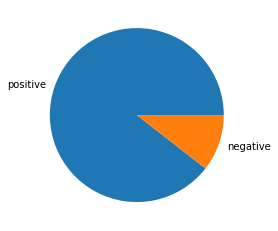

In [171]:
import matplotlib.pyplot as mlpt

posi=0
nega=0
for i in range (0,len(merged)):
    get_val=merged.sentiment_score[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(merged)))*100
negper=(nega/(len(merged)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

### Model training
We start by making a copy of our final processed dataset with all the relevent columns in order to start our model training.

In [172]:
Data=merged[['Date','text','Close','sentiment_score']].copy()
np.shape(Data)

(120, 4)

In [173]:
Data.head(10)

,Date,text,Close,sentiment_score
0,2022-04-03,berlin rocks erdayastronaut tesla raptor pump ...,280,0.9602
1,2022-04-04,hausmank googleai staggeringly unfunny wholema...,381,0.6705
2,2022-04-05,pmarca skepticaliblog yikes pmarca wapo always...,363,0.7579
3,2022-04-06,remedygames great games stockmktnewz sale took...,348,0.9100
4,2022-04-07,rt netflixfilm return space netflix april 7 el...,352,0.7878
5,2022-04-08,pmarca lmaooo waitbutwhy real problem ppathole...,341,0.9678
6,2022-04-09,teslaownerssv resemblance uncanny httpstcoegfd...,280,0.9810
7,2022-04-10,jeffbezos great idea blkmdl3 coming soon tesla...,280,0.4215
8,2022-04-14,httpstcopfqypliuvd billym2k vladtenev exactly ...,328,0.8750
9,2022-04-15,daelmor mfrunker 28delayslater wholemarsblog r...,280,0.6808


In [174]:
Data.tail(10)


,Date,text,Close,sentiment_score
110,2022-09-06,wholemarsblog solar batteries needed batteries...,274,-0.7372
111,2022-09-07,rt tesla tesla model receives highest safety s...,283,0.6808
112,2022-09-08,codingmark andy8671025 wholemarsblog assuming ...,289,0.9994
113,2022-09-09,take materials science 101 wont regret major f...,299,0.9477
114,2022-09-10,dirtytesla wholemarsblog yes wholemarsblog tea...,280,0.9628
115,2022-09-11,cbdoge paraga sigh fsd beta 10692 rolling plea...,280,0.7906
116,2022-09-12,residual value gasoline cars bought today much...,304,-0.2057
117,2022-09-13,huobiglobal subtle huobiglobal note working ma...,292,0.9870
118,2022-09-14,salted butter amazing stored room temperature ...,302,0.6597
119,2022-09-15,ilyasut short shorts httpstcoek4xby92ga ilyasu...,280,0.0000


As we can clearly see, the tweets lie between the time period "2022-03-04" and "2022-09-15". 
So we were able to manually divide the dataset into training and test set, allocating approximately 80% for training and 20% for evaluation.

In [175]:
Data.index = Data['Date']
train_data_start = '2022-04-03'
train_data_end = '2022-08-14'
test_data_start = '2022-08-15'
test_data_end = '2022-09-15'
train = Data.loc[train_data_start : train_data_end, : ]
test = Data.loc[test_data_start:test_data_end, : ]
np.shape(test)

(31, 4)

After that, we created a 2D array that will store the Negative and Positive sentiment for Training and Testing datasets.

In [176]:
#for training dataset
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([Data.loc[date, 'sentiment_score']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)


In [177]:
#for Testing dataset.
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([Data.loc[date, 'sentiment_score']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)


We also made two dataframes for Training and Testing "Closing prices".

In [178]:
y_train = pd.DataFrame(train['Close'])
y_test = pd.DataFrame(test['Close'])

We employed linear regression as our initial model choice. Linear regression is a commonly used model for establishing a simple linear relationship between variables. 

Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value).

In [179]:
#LinearRegression 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['Close'])   
prediction = regr.predict(numpy_dataframe_test)

Plotting the predicted closing price against the actual price of the test set:

R-squared Score: -1.1842249218634362


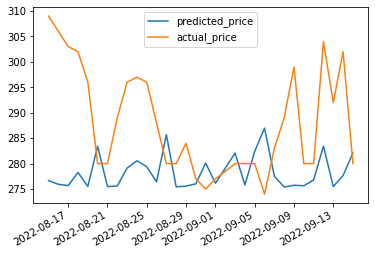

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
idx = idx[idx != '2022-09-02']

predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['Close'])
predictions_df['Close'] = predictions_df['Close']
predictions_df['actual_value'] = test['Close']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
accuracy = r2_score(test['Close'], prediction)
print("R-squared Score:", accuracy)

In our evaluation, we obtained a perplexing R-squared score of -1. This negative value suggests that the model's predictions were worse than simply using the mean value. This unexpected result might indicate that the linear regression model is not suitable for capturing the complex relationships between sentiment scores and stock market movements.

In the hope of increasing the R-squared score, we tried the random forest regressor model:

In [181]:
#RandromforestRegressor()

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['Close'])
prediction=rf.predict(numpy_dataframe_test)

R-squared Score: -3.5156275918956554


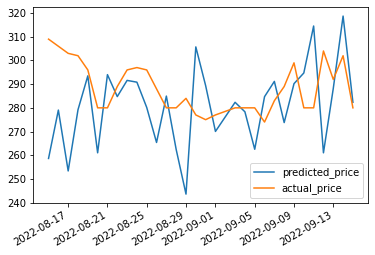

In [182]:
#Plot
idx = pd.date_range(test_data_start, test_data_end)
idx = idx[idx != '2022-09-02']


predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['Close'] )
predictions_df['actual_value'] = test['Close']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
accuracy = rf.score(numpy_dataframe_test, test['Close'])
print("R-squared Score:", accuracy)

Surprisingly, the evaluation of the random forest regressor yielded an even worse R-squared score of -4. This indicates that the model's predictions were significantly poorer than the linear regression model, suggesting that it struggled to capture the underlying patterns in the data.
 
At the end, we turned to the Multi Layer perceptron model which can capture more complex patterns in the data.

In [190]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                      solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
                   
#The ith element represents the number of Neutralrons in the ith
mlpc.fit(numpy_dataframe_train, train['Close'])   
prediction = mlpc.predict(numpy_dataframe_test)


/anaconda/envs/py38_default/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.22580645161290322


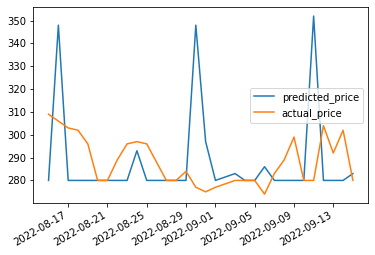

In [191]:
#plot
idx = pd.date_range(test_data_start, test_data_end)
idx = idx[idx != '2022-09-02']

predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])

predictions_df['actual_value'] = test['Close']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()

print(mlpc.score(numpy_dataframe_test, test['Close']))


The evaluation of the MLP classifier yielded an R-squared score of 0.23, which although not substantially high, outperformed the previous models. This suggests that the MLP classifier was able to capture more of the underlying patterns in the sentiment scores and their relationship to stock market movements.

### Model Optimization

In order to even more increase the accuracy, we tried different methods on the MLP classifier, the first one being cross-validation: 

In [192]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                     solver='lbfgs', alpha=0.005, learning_rate_init=0.001, shuffle=False, max_iter= 10000)

# Perform cross-validation
scores = cross_val_score(mlpc, numpy_dataframe_train, train['Close'], cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validated scores
print("Cross-validated scores:", scores)
print("Average accuracy:", scores.mean())

/anaconda/envs/py38_default/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross-validated scores: [0.22222222 0.22222222 0.11111111 0.16666667 0.17647059]
Average accuracy: 0.17973856209150327


We can observe a relatively lower accuracy after applying cross-validation compared to the accuracy obtained from a single train-test split. It indicates that the model's performance is more reliable and generalized, and it is less likely to be biased towards a specific train-test split.

As the cross-validation didn't work, we tried ensemble methods on the MLP classifier: Bagging


In [194]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

base_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='lbfgs', alpha=0.005, learning_rate_init=0.001, shuffle=False,
                               max_iter=100000)

bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(numpy_dataframe_train, train['Close'])
prediction = bagging_model.predict(numpy_dataframe_test)
# Evaluate the predictions
accuracy = accuracy_score(test['Close'], prediction)
print("Accuracy:", accuracy)

Accuracy: 0.22580645161290322


The accuracy of the MLPClassifier remained the same after applying bagging. Since bagging usually helps to reduce overfitting and improve the stability of the predictions, the fact that it didn't affect the accuracy of the data indicates that the MLPClassifier already performs well on its own and that the dataset is not very prone to overfitting.

### Conclusion: 
Overall, our initial attempts with linear regression and random forest regressor proved to be less effective in capturing the complexities of the data. However, the MLP classifier showed promise by achieving a relatively better performance. It is important to note that further analysis and fine-tuning of the models, as well as consideration of additional factors and alternative models, may be necessary to improve the accuracy of stock market prediction using sentiment scores.
